# Calculating line widths for flux maps

For this, rather than taking values from solutions the values are inputted manually from the escher maps. It would be better from the solution dfs but I don't fancy coding this at the moment...

In [1]:
import itertools

import numpy as np
import pandas as pd

In [2]:
conditions_permutations = [
    ["blue", "white", "nops"],
    ["unconstrained", "constrained"],
    ["wt", "starchko"],
    ["fluxes", "minimum", "maximum"],
]

solutions_df_columns = pd.MultiIndex.from_product(
    conditions_permutations, names=["Light", "ATPase", "Starch", "Solution"]
)
solutions_df = pd.DataFrame(columns=solutions_df_columns)

conditions_list_of_lists = [
    ["blue", "white", "nops"],
    ["unconstrained", "constrained"],
    ["wt", "starchko"],
]
conditions_iterations = list(itertools.product(*conditions_list_of_lists))

cols_to_drop = []
for conditions in conditions_iterations:
    light_condition, atpase_condition, starch_condition = conditions
    file_name = f"../outputs/model_solutions/{light_condition}_{atpase_condition}_{starch_condition}.csv"
    try:
        condition_df = pd.read_csv(file_name, index_col=0)
        for col in ["fluxes", "minimum", "maximum"]:
            solutions_df.loc[
                :, (light_condition, atpase_condition, starch_condition, col)
            ] = condition_df.loc[:, col]
    except:
        cols_to_drop.append(conditions)
        print(f"File {file_name} doesn't exist, skipping")


solutions_df_unphased = solutions_df.copy()
index_phased = pd.MultiIndex.from_tuples(
    [
        (reaction[:-2], int(reaction[-1]))
        if reaction[-1] in ["1", "2", "3", "4"]
        else (reaction, None)
        for reaction in solutions_df.index
    ],
    names=["Reaction", "Phase"],
)
solutions_df.index = index_phased
solutions_df = solutions_df.drop(cols_to_drop, axis=1)

/tmp/ipykernel_4834/2276567288.py:27: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  solutions_df.loc[
/tmp/ipykernel_4834/2276567288.py:27: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  solutions_df.loc[
/tmp/ipykernel_4834/2276567288.py:27: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  solutions_df.loc[
/tmp/ipykerne

In [3]:
solutions_df = solutions_df.xs("fluxes", level="Solution", axis=1).xs(2, level="Phase")

In [4]:
solutions_df

Light                           blue                                        \
ATPase                 unconstrained                 constrained             
Starch                            wt      starchko            wt  starchko   
Reaction                                                                     
EX_X_pi_t_me                0.000000  0.000000e+00  0.000000e+00  0.000000   
EX_X_pi_t_gc                0.000000  0.000000e+00  0.000000e+00  0.000000   
EX_X_CO2_t_me               4.128357  4.128357e+00  4.128356e+00  4.128355   
EX_X_CO2_t_gc               0.003663  4.036220e-03  2.176874e-03  0.001631   
EX_X_Mg_t_me                0.000000  0.000000e+00  0.000000e+00  0.000000   
...                              ...           ...           ...       ...   
MAL_total_pseudolinker      0.004445  4.525811e-03  2.358282e-03  0.001766   
FRU_total_pseudolinker      0.000000  0.000000e+00  1.737018e-03  0.006863   
K_total_pseudolinker        0.013250  1.303211e-02  9.057052e-03  0.005820   
Cl_total_pseudolinker       0.011572  1.303197e-02  7.424397e-03  0.004597   
CIT_total_pseudolinker      0.000000  4.690523e-08 -4.632768e-10  0.000000   

Light                          white                                       \
ATPase                 unconstrained            constrained                 
Starch                            wt   starchko          wt      starchko   
Reaction                                                                    
EX_X_pi_t_me            0.000000e+00   0.000000    0.000000  0.000000e+00   
EX_X_pi_t_gc            0.000000e+00   0.000000    0.000000  0.000000e+00   
EX_X_CO2_t_me          -5.388402e+01 -53.884016  -53.884016 -5.388402e+01   
EX_X_CO2_t_gc           1.156296e-03   0.001168   -0.001087 -1.371060e-03   
EX_X_Mg_t_me            0.000000e+00   0.000000    0.000000  0.000000e+00   
...                              ...        ...         ...           ...   
MAL_total_pseudolinker  4.455754e-03   0.004487    0.000000 -6.494415e-10   
FRU_total_pseudolinker  0.000000e+00   0.000000    0.001898  6.805909e-03   
K_total_pseudolinker    1.292071e-02   0.012970    0.005393  4.495170e-03   
Cl_total_pseudolinker   1.292071e-02   0.012970    0.005393  4.495170e-03   
CIT_total_pseudolinker -2.844564e-18   0.000000    0.000000  0.000000e+00   

Light                           nops                                    
ATPase                 unconstrained            constrained             
Starch                            wt   starchko          wt   starchko  
Reaction                                                                
EX_X_pi_t_me                0.000000   0.000000    0.000000   0.000000  
EX_X_pi_t_gc                0.000000   0.000000    0.000000   0.000000  
EX_X_CO2_t_me             -53.884046 -53.884046  -53.884048 -53.884048  
EX_X_CO2_t_gc               0.002922   0.002922    0.001837   0.002173  
EX_X_Mg_t_me                0.000000   0.000000    0.000000   0.000000  
...                              ...        ...         ...        ...  
MAL_total_pseudolinker      0.002314   0.002314    0.000918   0.002355  
FRU_total_pseudolinker      0.000347   0.000347    0.004141   0.006863  
K_total_pseudolinker        0.009849   0.009849    0.006187   0.005980  
Cl_total_pseudolinker       0.008247   0.008247    0.004350   0.004350  
CIT_total_pseudolinker      0.000000   0.000000    0.000000   0.000000  

[1774 rows x 12 columns]

In [5]:
reaction_dict = {
    "starch_to_glc": "RXN_1827_p_gc_2",
    "starch_to_mal": "MALTODEG_RXN_c_gc_2",
    #"starch_to_glc_mal": "MALTODEG_RXN_c_gc_2",
    "mal_deg": "MALIC_NAD_RXN_m_gc_2",
    "mal_v_c": "MAL_vc_gc_2",
    "ps_to_suc": "SUCROSE_PHOSPHATE_SYNTHASE_RXN_c_gc_2",
    #"ps_to_glc": "GLUC1PURIDYLTRANS_RXN_c_gc_2",
    #"cit_to_mal": "FUMHYDR_RXN_m_gc_2",
    "cit_to_mal": "SUCCCOASYN_RXN_m_gc_2",
    "suc_c_v": "SUCROSE_PROTON_cv_gc_2",
    "suc_v_deg": "RXN_1461_v_gc_2",
    "suc_c_deg": "RXN_1461_c_gc_2",
    "suc_to_fru": "SUCROSE_SYNTHASE_RXN_c_gc_2",
    "cit_to_acon": "ACONITATEDEHYDR_RXN_c_gc_2",
    "cit_synth": "CITSYN_RXN_m_gc_2",
    
}

In [6]:
flux_dict = {
    "blue": {
        "unconstrained": {
            "wt": dict(reaction_dict),
            "starchko": dict(reaction_dict)
        },
        "constrained": {
            "wt": dict(reaction_dict),
            "starchko": dict(reaction_dict)
        }
    },
    "white": {
        "constrained": {
            "wt": dict(reaction_dict),
            "starchko": dict(reaction_dict)
        }
    },
    "nops": {
        "constrained": {
            "wt": dict(reaction_dict),
            "starchko": dict(reaction_dict)
        }
    }
}

In [7]:
conditions_list_of_lists = [
    ["blue", "white", "nops"],
    ["unconstrained", "constrained"],
    ["wt", "starchko"],
]
conditions_iterations = list(itertools.product(*conditions_list_of_lists))

In [8]:
solutions_df

Light                           blue                                        \
ATPase                 unconstrained                 constrained             
Starch                            wt      starchko            wt  starchko   
Reaction                                                                     
EX_X_pi_t_me                0.000000  0.000000e+00  0.000000e+00  0.000000   
EX_X_pi_t_gc                0.000000  0.000000e+00  0.000000e+00  0.000000   
EX_X_CO2_t_me               4.128357  4.128357e+00  4.128356e+00  4.128355   
EX_X_CO2_t_gc               0.003663  4.036220e-03  2.176874e-03  0.001631   
EX_X_Mg_t_me                0.000000  0.000000e+00  0.000000e+00  0.000000   
...                              ...           ...           ...       ...   
MAL_total_pseudolinker      0.004445  4.525811e-03  2.358282e-03  0.001766   
FRU_total_pseudolinker      0.000000  0.000000e+00  1.737018e-03  0.006863   
K_total_pseudolinker        0.013250  1.303211e-02  9.057052e-03  0.005820   
Cl_total_pseudolinker       0.011572  1.303197e-02  7.424397e-03  0.004597   
CIT_total_pseudolinker      0.000000  4.690523e-08 -4.632768e-10  0.000000   

Light                          white                                       \
ATPase                 unconstrained            constrained                 
Starch                            wt   starchko          wt      starchko   
Reaction                                                                    
EX_X_pi_t_me            0.000000e+00   0.000000    0.000000  0.000000e+00   
EX_X_pi_t_gc            0.000000e+00   0.000000    0.000000  0.000000e+00   
EX_X_CO2_t_me          -5.388402e+01 -53.884016  -53.884016 -5.388402e+01   
EX_X_CO2_t_gc           1.156296e-03   0.001168   -0.001087 -1.371060e-03   
EX_X_Mg_t_me            0.000000e+00   0.000000    0.000000  0.000000e+00   
...                              ...        ...         ...           ...   
MAL_total_pseudolinker  4.455754e-03   0.004487    0.000000 -6.494415e-10   
FRU_total_pseudolinker  0.000000e+00   0.000000    0.001898  6.805909e-03   
K_total_pseudolinker    1.292071e-02   0.012970    0.005393  4.495170e-03   
Cl_total_pseudolinker   1.292071e-02   0.012970    0.005393  4.495170e-03   
CIT_total_pseudolinker -2.844564e-18   0.000000    0.000000  0.000000e+00   

Light                           nops                                    
ATPase                 unconstrained            constrained             
Starch                            wt   starchko          wt   starchko  
Reaction                                                                
EX_X_pi_t_me                0.000000   0.000000    0.000000   0.000000  
EX_X_pi_t_gc                0.000000   0.000000    0.000000   0.000000  
EX_X_CO2_t_me             -53.884046 -53.884046  -53.884048 -53.884048  
EX_X_CO2_t_gc               0.002922   0.002922    0.001837   0.002173  
EX_X_Mg_t_me                0.000000   0.000000    0.000000   0.000000  
...                              ...        ...         ...        ...  
MAL_total_pseudolinker      0.002314   0.002314    0.000918   0.002355  
FRU_total_pseudolinker      0.000347   0.000347    0.004141   0.006863  
K_total_pseudolinker        0.009849   0.009849    0.006187   0.005980  
Cl_total_pseudolinker       0.008247   0.008247    0.004350   0.004350  
CIT_total_pseudolinker      0.000000   0.000000    0.000000   0.000000  

[1774 rows x 12 columns]

In [9]:
for light, light_dict in flux_dict.items():
    for atpase, atpase_dict in light_dict.items():
        for starch, starch_dict in atpase_dict.items():
            for shorthand, reaction_name in starch_dict.items():
                flux = solutions_df.loc[reaction_name[:-2],(light, atpase, starch)]
                if abs(flux) < 1e-8:
                    flux = 0
                flux_dict[light][atpase][starch][shorthand] = flux

In [10]:
solutions_df.loc["GLUC1PURIDYLTRANS_RXN_c_gc"]

Light  ATPase         Starch  
blue   unconstrained  wt          1.190563e-04
                      starchko    1.960967e-04
       constrained    wt         -4.632788e-10
                      starchko    2.462117e-12
white  unconstrained  wt          4.278484e-04
                      starchko    4.304933e-04
       constrained    wt         -9.054699e-04
                      starchko    1.142550e-04
nops   unconstrained  wt         -1.310427e-04
                      starchko   -1.310166e-04
       constrained    wt          0.000000e+00
                      starchko    0.000000e+00
Name: GLUC1PURIDYLTRANS_RXN_c_gc, dtype: float64

In [11]:
flux_dict

{'blue': {'unconstrained': {'wt': {'starch_to_glc': 0,
    'starch_to_mal': 0,
    'mal_deg': 0,
    'mal_v_c': 0.0084862683952195,
    'ps_to_suc': 0.0001190562980565,
    'cit_to_mal': 0.0013558713124941,
    'suc_c_v': 0,
    'suc_v_deg': 0,
    'suc_c_deg': 0,
    'suc_to_fru': 0,
    'cit_to_acon': 0.0013558713124941,
    'cit_synth': 0.000237558821619},
   'starchko': {'starch_to_glc': 0,
    'starch_to_mal': 0,
    'mal_deg': 0.0006650467732122,
    'mal_v_c': 0.010648966832743,
    'ps_to_suc': 0.0001960966512218,
    'cit_to_mal': 0.0008129115147968,
    'suc_c_v': 0,
    'suc_v_deg': 0,
    'suc_c_deg': 0,
    'suc_to_fru': 0,
    'cit_to_acon': 0,
    'cit_synth': 0.0008130053252513}},
  'constrained': {'wt': {'starch_to_glc': 0.0051260186331311,
    'starch_to_mal': 0,
    'mal_deg': 0,
    'mal_v_c': 0.0036281277404994,
    'ps_to_suc': 0,
    'cit_to_mal': 0.0010884364690379,
    'suc_c_v': 0,
    'suc_v_deg': 0.0034740356910968,
    'suc_c_deg': 0,
    'suc_to_fru': 0,
 

In [12]:
from sigfig import round

In [13]:
def NestedDictValues(d):
    for v in d.values():
        if isinstance(v, dict):
            yield from NestedDictValues(v)
        else:
            yield v

In [14]:
min_flux = np.array(list(NestedDictValues(flux_dict))).min()
min_flux

0.0

In [15]:
max_flux = np.array(list(NestedDictValues(flux_dict))).max()
max_flux

0.013726072962268

In [16]:
max_flux/min_flux

/tmp/ipykernel_4834/4031404064.py:1: RuntimeWarning: divide by zero encountered in scalar divide
  max_flux/min_flux


inf

So we have a 50-fold difference between the smallest and largest flux. 5mm in the inkscape figures that I've created is probably the max I can do, so 0.1 is the minimum.

Inkscape will only do widths to nearest 0.01mm I think, but allows you to input 3 numbers after the dp.

In [17]:
def convert_fluxes_to_widths_linear(flux):
    max_width_in_inkscape = 5
    conversion = max_width_in_inkscape/max_flux

    new_flux = conversion*flux
    new_flux_rounded = round(new_flux, 3)

    return new_flux_rounded

In [18]:
import matplotlib.pyplot as plt

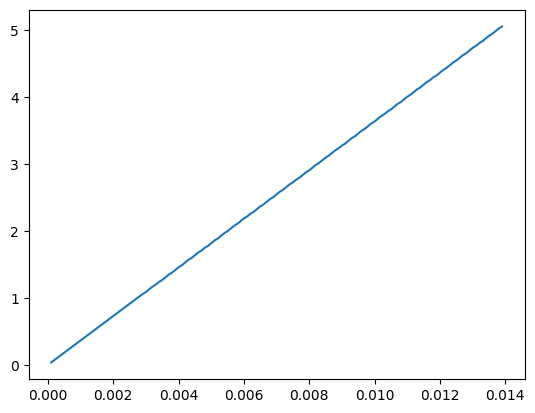

In [19]:
x = np.arange(0.0001, 0.014, 0.0001)
y = [convert_fluxes_to_widths_linear(flux) for flux in x]

plt.plot(x, y)

In [20]:
import copy

In [21]:
def convert_flux_dict(flux_dict):
    converted_dict = copy.deepcopy(flux_dict)
    for light_value, light_dict in flux_dict.items():
        for atpase_constraint, atpase_dict in light_dict.items():
            for phenotype, phenotype_dict in atpase_dict.items():
                for reaction, reaction_value in phenotype_dict.items():
                    converted_dict[light_value][atpase_constraint][phenotype][reaction] = convert_fluxes_to_widths_linear(
                        reaction_value)

    return converted_dict

In [22]:
converted_dict = convert_flux_dict(flux_dict)

/home/maurice/miniconda3/envs/mmon-gcm/lib/python3.9/site-packages/sigfig/sigfig.py:586: UserWarning: warning: 3 significant figures requested from number with only 1 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
/home/maurice/miniconda3/envs/mmon-gcm/lib/python3.9/site-packages/sigfig/sigfig.py:586: UserWarning: warning: 3 significant figures requested from number with only 2 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))


In [23]:
for light, light_dict in converted_dict.items():
    for atpase, atpase_dict in light_dict.items():
        for starch, starch_dict in atpase_dict.items():
            print(f"{light}_{atpase}_{starch}:")
            for shorthand, mm in starch_dict.items():
                if mm > 0:
                    #print(f"{shorthand} should be {mm}mm wide")
                    print(f"{shorthand} should be {mm*175}%")
            print("\n")

blue_unconstrained_wt:
mal_v_c should be 540.75%
ps_to_suc should be 7.595%
cit_to_mal should be 86.45%
cit_to_acon should be 86.45%
cit_synth should be 15.1375%


blue_unconstrained_starchko:
mal_deg should be 42.35%
mal_v_c should be 679.0%
ps_to_suc should be 12.495000000000001%
cit_to_mal should be 51.8%
cit_synth should be 51.8%


blue_constrained_wt:
starch_to_glc should be 327.25%
mal_v_c should be 231.0%
cit_to_mal should be 69.3%
suc_v_deg should be 222.25%
cit_to_acon should be 69.3%


blue_constrained_starchko:
mal_v_c should be 173.25%
cit_to_mal should be 51.974999999999994%
suc_v_deg should be 875.0%
cit_to_acon should be 51.974999999999994%


white_constrained_wt:
starch_to_glc should be 344.75%
ps_to_suc should be 69.3%
suc_v_deg should be 114.97500000000001%
suc_to_fru should be 127.05%


white_constrained_starchko:
ps_to_suc should be 7.279999999999999%
suc_v_deg should be 868.0%


nops_constrained_wt:
starch_to_glc should be 163.8%
starch_to_mal should be 19.6%
cit_t

## For the key:

In [24]:
import cobra
import pandas as pd
from mmon_gcm.supermodel import SuperModel

In [25]:
parameters_df = pd.read_csv("../inputs/arabidopsis_parameters.csv", index_col=0)
four_stage_GC_model = cobra.io.sbml.read_sbml_model("../models/4_stage_GC.xml")  # read model
arabidopsis_supermodel = SuperModel(parameters_df.loc[:, "Value"], fba_model=four_stage_GC_model);

No objective coefficients in model. Unclear what should be optimized


In [26]:
arabidopsis_supermodel.N_gcs

580000000.0

In [27]:
0.01/arabidopsis_supermodel.N_gcs

1.724137931034483e-11

In [28]:
moles_gc_h = 10 * 10 ** -15  # fmolesgc-1h-1

In [29]:
moles_m2_h = moles_gc_h*arabidopsis_supermodel.N_gcs  # molesh-1

In [30]:
mmoles_m2_h = moles_m2_h * 10 ** 3
mmoles_m2_h

0.005800000000000001

In [31]:
f"{convert_fluxes_to_widths_linear(mmoles_m2_h)}mm for a flux of 10 fmoles gc-1 h-1"

'2.11mm for a flux of 10 fmoles gc-1 h-1'